# Import Packages

In [2]:
import numpy as np
import scipy.integrate
import scipy.optimize
import matplotlib.pylab as plt

# Simplified Models

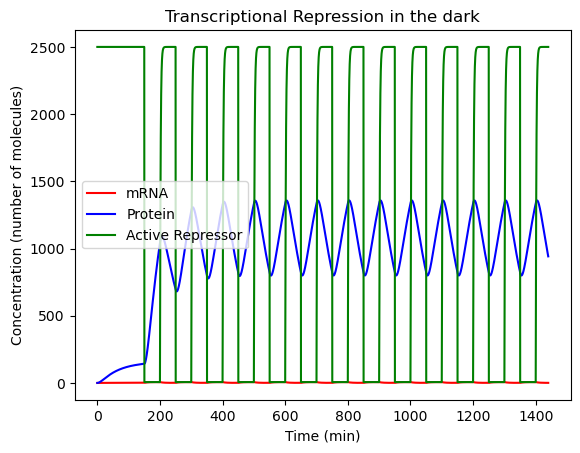

In [207]:
## The goal of the additional modelling being done is to establish what sort of differences might we expect from the different forms of optogenetic control present in literature. These models are intentionally kept simple to understand why we hypothesize that certain models may have faster dynamics than others.
## For the purposes of this Master's thesis, we will be looking at 4 different forms of optogenetic control as well as iterations of some of each form of control.

## Example 1: Transcriptional control (i.e. LexRO, BLADE and LEVI)
## A typical system would involve an optogenetic regulator protein acting on the promoter of a gene of interest (GOI) in the presence of the appropriate wavelength of light.
## Repression and activation are both covered as R and A respectively. Regulators which operate in the light or dark are covered as L and D respsectively.

#Transcriptional repression in the dark
def transcriptional_controlRD(ic, t):
    R, C, D, M, P = ic
    #Parameters
    
    kde = 0.5 #de-excitation reaction constant
    ke = 0.001 #excitation reaction constant
    Rt = 2500 #Total amount of Repressor
    a = 0.1 #Repressor association rate
    b = 0.1 #Repressor dissociation rate
    n = 2 #Cooperativity constant
    l = 0.01 #Leaky transcription of inhibitory complex
    km = 4.7 #rate of transcription of unbound DNA
    dm = 0.1 #rate of mRNA degradation/dilution
    kp = 5.3 #rate of translation
    dp = 0.000167 + 0.01667 #rate of protein degradation/dilution
    
    #Light intensity
    I = 0
    
    #for on/off
    #if t < 500:
    #    I = 0
    #elif 500 < t < 1000:
    #    I = 200000
    #elif t > 1000:
    #    I = 0
    
    #for oscillations
    for i in range (200):
        if t < 100:
            I = 0
        elif 100 * i - 50 < t < 100 * i:
            I = 200000


    return np.array(
        [
            
            (Rt - R) * kde - I * ke * R,
            
            (a * D * (R ** n)) - (b * C),
            
            (b * C) - (a * D * (R ** n)),
            
            (C * l) + (km * D) - (dm * M),
            
            (kp * M) - (dp * P)
        ]
    )
    
#Initial conditions [R, C, D, M, P]
tcRD_ic = np.array([2500, 0, 5, 0, 0])

#ODE Solver
def solve_tcRD(t_max, n_points):
    t = np.linspace(0, t_max, n_points)    
    x = scipy.integrate.odeint(transcriptional_controlRD, tcRD_ic, t)
    R, C, D, M, P = x.transpose()
    return t, R, C, D, M, P

tcRD_output = solve_tcRD(1440, 14400)

t_tcRD = tcRD_output[0]
R_tcRD = tcRD_output[1]
C_tcRD = tcRD_output[2]
D_tcRD = tcRD_output[3]
M_tcRD = tcRD_output[4]
P_tcRD = tcRD_output[5]

plt.plot(t_tcRD, M_tcRD, color='r', label='mRNA')
plt.plot(t_tcRD, P_tcRD, color='b', label='Protein')
plt.plot(t_tcRD, R_tcRD, color='g', label='Active Repressor')
plt.xlabel('Time (min)')
plt.ylabel('Concentration (number of molecules)')
plt.title('Transcriptional Repression in the dark')
plt.legend()
plt.show()

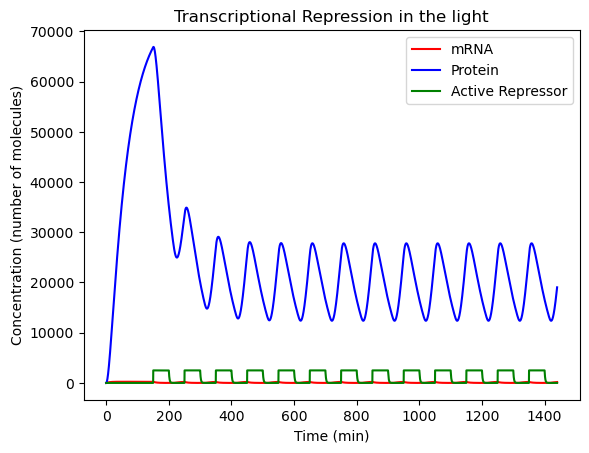

In [208]:
#transcriptional repression in the light
def transcriptional_controlRL(ic, t):
    R, C, D, M, P = ic
    #Parameters
    
    kde = 0.5 #de-excitation reaction constant
    ke = 0.001 #excitation reaction constant
    Rt = 2500 #Total amount of Repressor
    a = 0.1 #Repressor association rate
    b = 0.1 #Repressor dissociation rate
    n = 2 #Cooperativity constant
    l = 0.01 #Leaky transcription of inhibitory complex
    km = 4.7 #rate of transcription of unbound DNA
    dm = 0.1 #rate of mRNA degradation/dilution
    kp = 5.3 #rate of translation
    dp = 0.000167 + 0.01667 #rate of protein degradation/dilution
    
    #Light intensity
    I = 0
    
    #for on/off
    #if t < 500:
    #    I = 0
    #elif 500 < t < 1000:
    #    I = 200000
    #elif t > 1000:
    #    I = 0
    
    #for oscillations
    for i in range (200):
        if t < 100:
            I = 0
        elif 100 * i - 50 < t < 100 * i:
            I = 200000
        
    return np.array(
        [
            
            (I * ke * (Rt - R)) - R * kde,
            
            (a * D * (R ** n)) - (b * C),
            
            (b * C) - (a * D * (R ** n)),
            
            (C * l) + (km * D) - (dm * M),
            
            (kp * M) - (dp * P)
        ]
    )
    
#Initial conditions [R, C, D, M, P]
tcRL_ic = np.array([0, 0, 5, 0, 0])

#ODE Solver
def solve_tcRL(t_max, n_points):
    t = np.linspace(0, t_max, n_points)    
    x = scipy.integrate.odeint(transcriptional_controlRL, tcRL_ic, t)
    R, C, D, M, P = x.transpose()
    return t, R, C, D, M, P

tcRL_output = solve_tcRL(1440, 14400)

t_tcRL = tcRL_output[0]
R_tcRL = tcRL_output[1]
C_tcRL = tcRL_output[2]
D_tcRL = tcRL_output[3]
M_tcRL = tcRL_output[4]
P_tcRL = tcRL_output[5]

plt.plot(t_tcRL, M_tcRL, color='r', label='mRNA')
plt.plot(t_tcRL, P_tcRL, color='b', label='Protein')
plt.plot(t_tcRL, R_tcRL, color='g', label='Active Repressor')
plt.xlabel('Time (min)')
plt.ylabel('Concentration (number of molecules)')
plt.title('Transcriptional Repression in the light')
plt.legend()
plt.show()

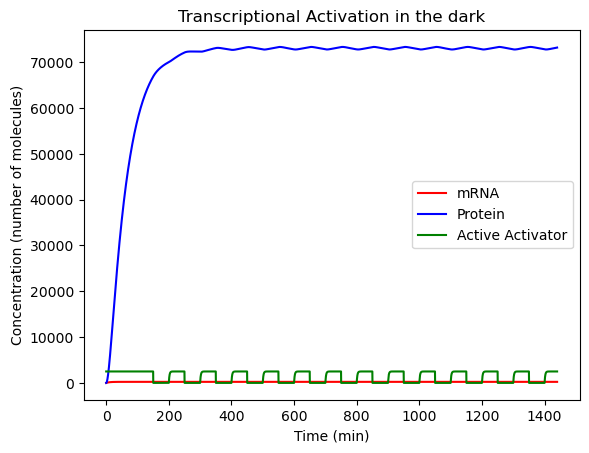

In [209]:
#transcriptional activation in the dark
def transcriptional_controlAD(ic, t):
    A, C, D, M, P = ic
    #Parameters
    
    kde = 0.5 #de-excitation reaction constant
    ke = 0.001 #excitation reaction constant
    At = 2500 #Total amount of Activator
    a = 0.1 #Activator association rate
    b = 0.1 #Activator dissociation rate
    n = 2 #Cooperativity constant
    kmc = 0.01 #Constitutive/basal expression of free DNA
    kma = 4.7 #rate of transcription of activator bound DNA
    dm = 0.1 #rate of mRNA degradation/dilution
    kp = 5.3 #rate of translation
    dp = 0.000167 + 0.01667 #rate of protein degradation/dilution
    
    #Light intensity
    I = 0
    
    #for on/off
    #if t < 500:
    #    I = 0
    #elif 500 < t < 1000:
    #    I = 200000
    #elif t > 1000:
    #    I = 0
    
    #for oscillations
    for i in range (200):
        if t < 100:
            I = 0
        elif 100 * i - 50 < t < 100 * i:
            I = 200000
        
    return np.array(
        [
            
            (At - A) * kde - I * A * ke,
            
            (a * D * (A ** n)) - (b * C),
            
            (b * C) - (a * D * (A ** n)),
            
            (C * kma) + (kmc * D) - (dm * M),
            
            (kp * M) - (dp * P)
        ]
    )
    
#Initial conditions [A, C, D, M, P]
tcAD_ic = np.array([2500, 0, 5, 0, 0])

#ODE Solver
def solve_tcAD(t_max, n_points):
    t = np.linspace(0, t_max, n_points)    
    x = scipy.integrate.odeint(transcriptional_controlAD, tcAD_ic, t)
    A, C, D, M, P = x.transpose()
    return t, A, C, D, M, P

tcAD_output = solve_tcAD(1440, 14400)

t_tcAD = tcAD_output[0]
A_tcAD = tcAD_output[1]
C_tcAD = tcAD_output[2]
D_tcAD = tcAD_output[3]
M_tcAD = tcAD_output[4]
P_tcAD = tcAD_output[5]

plt.plot(t_tcAD, M_tcAD, color='r', label='mRNA')
plt.plot(t_tcAD, P_tcAD, color='b', label='Protein')
plt.plot(t_tcAD, A_tcAD, color='g', label='Active Activator')
plt.xlabel('Time (min)')
plt.ylabel('Concentration (number of molecules)')
plt.title('Transcriptional Activation in the dark')
plt.legend()
plt.show()

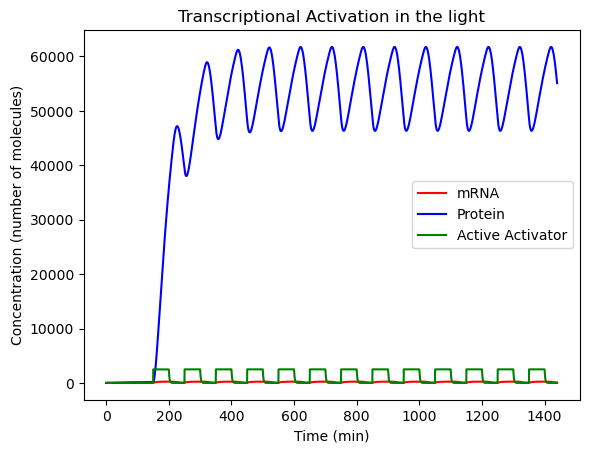

In [210]:
#transcriptional activation in the light
def transcriptional_controlAL(ic, t):
    A, C, D, M, P = ic
    #Parameters
    
    kde = 0.5 #de-excitation reaction constant
    ke = 0.001 #excitation reaction constant
    At = 2500 #Total amount of Activator
    a = 0.1 #Activator association rate
    b = 0.1 #Activator dissociation rate
    n = 2 #Cooperativity constant
    kmc = 0.01 #Constitutive/basal expression of free DNA
    kma = 4.7 #rate of transcription of activator bound DNA
    dm = 0.1 #rate of mRNA degradation/dilution
    kp = 5.3 #rate of translation
    dp = 0.000167 + 0.01667 #rate of protein degradation/dilution
    
    #Light intensity
    I = 0
    
    #for on/off
    #if t < 500:
    #    I = 0
    #elif 500 < t < 1000:
    #    I = 200000
    #elif t > 1000:
    #    I = 0
    
    #for oscillations
    for i in range (200):
        if t < 100:
            I = 0
        elif 100 * i - 50 < t < 100 * i:
            I = 200000
        
    return np.array(
        [
            
            (At - A) * ke * I - A * kde,
            
            (a * D * (A ** n)) - (b * C),
            
            (b * C) - (a * D * (A ** n)),
            
            (C * kma) + (kmc * D) - (dm * M),
            
            (kp * M) - (dp * P)
        ]
    )
    
#Initial conditions [A, C, D, M, P]
tcAL_ic = np.array([0, 0, 5, 0, 0])

#ODE Solver
def solve_tcAL(t_max, n_points):
    t = np.linspace(0, t_max, n_points)    
    x = scipy.integrate.odeint(transcriptional_controlAL, tcAL_ic, t)
    A, C, D, M, P = x.transpose()
    return t, A, C, D, M, P

tcAL_output = solve_tcAL(1440, 14400)

t_tcAL = tcAL_output[0]
A_tcAL = tcAL_output[1]
C_tcAL = tcAL_output[2]
D_tcAL = tcAL_output[3]
M_tcAL = tcAL_output[4]
P_tcAL = tcAL_output[5]

plt.plot(t_tcAL, M_tcAL, color='r', label='mRNA')
plt.plot(t_tcAL, P_tcAL, color='b', label='Protein')
plt.plot(t_tcAL, A_tcAL, color='g', label='Active Activator')
plt.xlabel('Time (min)')
plt.ylabel('Concentration (number of molecules)')
plt.title('Transcriptional Activation in the light')
plt.legend()
plt.show()

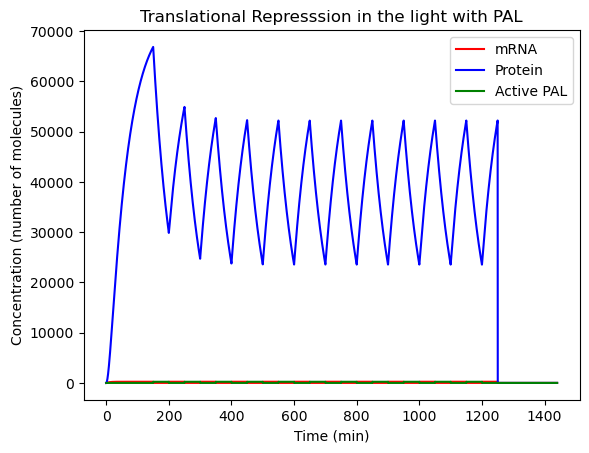

In [212]:
#translational repression using PAL
def translational_controlPAL(ic, t):
    Mf, Mb, PALf, PALC, P = ic
    #Parameters
    
    D = 5 #copy number/free dna
    kde = 0.5 #de-excitation reaction constant
    ke = 0.0001 #excitation reaction constant and binding constant
    kmc = 4.7 #Constitutive/basal expression of free DNA
    dm = 0.1 #rate of free mRNA degradation/dilution
    dmb = 0.1 #rate of bound mRNA degradation/dilution
    kp = 5.3 #rate of translation
    dp = 0.000167 + 0.01667 #rate of protein degradation/dilution
    
    #Light intensity
    I = 0
    
    #for on/off
    #if t < 500:
    #    I = 0
    #elif 500 < t < 1000:
    #    I = 200000
    #elif t > 1000:
    #    I = 0
    
    #for oscillations
    for i in range (200):
        if t < 100:
            I = 0
        elif 100 * i - 50 < t < 100 * i:
            I = 20000
        
    return np.array(
        [
            
            kmc * D - dm * Mf + kde * PALC * Mb - I * Mf * PALf * ke,
            
            I * Mf * PALf * ke - kde * Mb * PALC - dmb * Mb,
            
            kde * PALC * Mb - I * Mf * PALf * ke + dmb * Mb,
            
            I * Mf * PALf * ke - kde * PALC * Mb - dmb * Mb,
            
            Mf * kp - dp * P
        ]
    )
    
#Initial conditions [Mf, Mb, PALf, PALC, P]
PAL_ic = np.array([0, 0, 2500, 0, 0])

#ODE Solver
def solve_PAL(t_max, n_points):
    t = np.linspace(0, t_max, n_points)    
    x = scipy.integrate.odeint(translational_controlPAL, PAL_ic, t)
    Mf, Mb, PALf, PALC, P = x.transpose()
    return t, Mf, Mb, PALf, PALC, P

PAL_output = solve_PAL(1440, 14400)

t_PAL = PAL_output[0]
Mf_PAL = PAL_output[1]
Mb_PAL = PAL_output[2]
PALf_PAL = PAL_output[3]
PALC_PAL = PAL_output[4]
P_PAL = PAL_output[5]

plt.plot(t_PAL, Mf_PAL, color='r', label='mRNA')
plt.plot(t_PAL, P_PAL, color='b', label='Protein')
plt.plot(t_PAL, PALC_PAL, color='g', label='Active PAL')
plt.xlabel('Time (min)')
plt.ylabel('Concentration (number of molecules)')
plt.title('Translational Represssion in the light with PAL')
plt.legend()
plt.show()



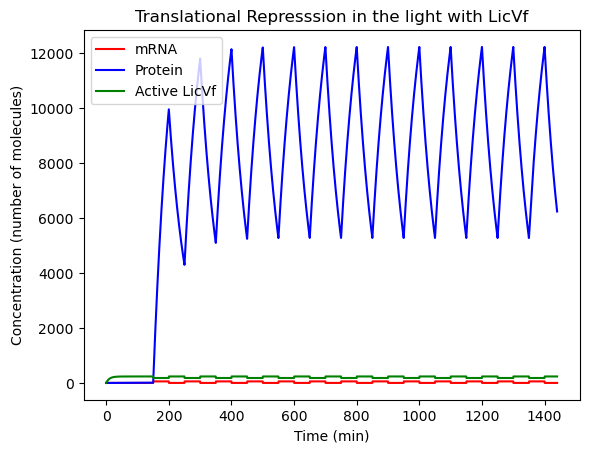

In [216]:
#translational repression using LicVF
def translational_controlLIC(ic, t):
    Mf, Mb, LICf, LICC, P = ic
    #Parameters
    
    D = 5 #copy number/free dna
    kde = 0.5 #de-excitation reaction constant
    ke = 0.0001 #excitation reaction constant and binding constant
    kmc = 4.7 #Constitutive/basal expression of free DNA
    dm = 0.1 #rate of free mRNA degradation/dilution
    dmb = 0.1 #rate of bound mRNA degradation/dilution
    kp = 5.3 #rate of translation
    dp = 0.000167 + 0.01667 #rate of protein degradation/dilution
    
    #Light intensity
    I = 0
    
    #for on/off
    #if t < 500:
    #    I = 0
    #elif 500 < t < 1000:
    #    I = 200000
    #elif t > 1000:
    #    I = 0
    
    #for oscillations
    for i in range (200):
        if t < 100:
            I = 0
        elif 100 * i - 50 < t < 100 * i:
            I = 20000
        
    return np.array(
        [
            
            kmc * D - dm * Mf - kde * LICf * Mf + I * Mb * LICC * ke,
            
            kde * Mf * LICf - I * Mb * LICC * ke - dmb * Mb,
            
            I * Mb * LICC * ke - kde * Mf * LICf + dmb * Mb,
            
            kde * Mf * LICf - I * ke * Mb * LICC - dmb * Mb,
            
            Mf * kp - dp * P
        ]
    )
    
#Initial conditions [Mf, Mb, LICf, LICC, P]
LIC_ic = np.array([0, 0, 2500, 0, 0])

#ODE Solver
def solve_LIC(t_max, n_points):
    t = np.linspace(0, t_max, n_points)    
    x = scipy.integrate.odeint(translational_controlLIC, LIC_ic, t)
    Mf, Mb, LICf, LICC, P = x.transpose()
    return t, Mf, Mb, LICf, LICC, P

LIC_output = solve_LIC(1440, 14400)

t_LIC = LIC_output[0]
Mf_LIC = LIC_output[1]
Mb_LIC = LIC_output[2]
LICf_LIC = LIC_output[3]
LICC_LIC = LIC_output[4]
P_LIC = LIC_output[5]

plt.plot(t_LIC, Mf_LIC, color='r', label='mRNA')
plt.plot(t_LIC, P_LIC, color='b', label='Protein')
plt.plot(t_LIC, LICC_LIC, color='g', label='Active LicVf')
plt.xlabel('Time (min)')
plt.ylabel('Concentration (number of molecules)')
plt.title('Translational Represssion in the light with LicVf')
plt.legend()
plt.show()

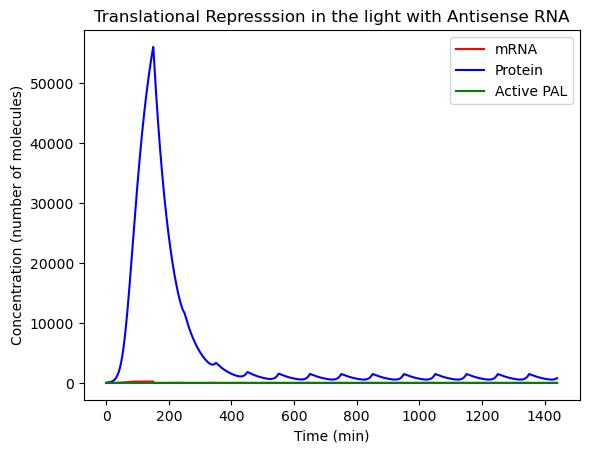

In [214]:
#translational repression using antisense RNA
def translational_controlAnti(ic, t):
    nMag, pMag, T7, anti, dsRNA, M, P = ic
    #Parameters
    
    D_m = 5 #copy number/free dna of GOI
    D_anti = 5 #copy number/free dna of antisense rna
    kdede = 0.5 #de-excitation reaction constant & dissociation constant
    kbe = 0.0001 #excitation reaction constant and binding constant
    kanti = 4.7 #rate of transcription of antisense rna
    danti = 0.1 #rate of degradation of antisense rna
    kdsb = 0.1 #association constant for dsRNA formation
    kdsd = 0.1 #dissociation constant for dsRNA dissociation
    ddsRNA = 1 #rate of degradation of dsRNA
    km = 4.7 #Constitutive/basal expression of free DNA
    dm = 0.1 #rate of free mRNA degradation/dilution
    kp = 5.3 #rate of translation
    dp = 0.000167 + 0.01667 #rate of protein degradation/dilution
    
    #Light intensity
    I = 0
    
    #for on/off
    #if t < 500:
    #    I = 0
    #elif 500 < t < 1000:
    #    I = 200000
    #elif t > 1000:
    #    I = 0
    
    #for oscillations
    for i in range (200):
        if t < 100:
            I = 0
        elif 100 * i - 50 < t < 100 * i:
            I = 200000
        
    return np.array(
        [
            
            kdede * T7 - I * kbe * nMag * pMag,
            
            kdede * T7 - I * kbe * nMag * pMag,
            
            I * kbe * nMag * pMag - kdede * T7,
            
            D_anti * T7 * kanti - anti *danti,
            
            kdsb * anti * M - dsRNA * ddsRNA - kdsd * dsRNA,
            
            km * D_m - dm * M - kdsb * anti * M + kdsd * dsRNA,
            
            M * kp - dp * P
        ]
    )
    
#Initial conditions [nMag, pMag, T7, anti, dsRNA, M, P]
Anti_ic = np.array([0, 0, 5, 0, 0, 0, 0])

#ODE Solver
def solve_Anti(t_max, n_points):
    t = np.linspace(0, t_max, n_points)    
    x = scipy.integrate.odeint(translational_controlAnti, Anti_ic, t)
    nMag, pMag, T7, anti, dsRNA, M, P = x.transpose()
    return t, nMag, pMag, T7, anti, dsRNA, M, P

Anti_output = solve_Anti(1440, 14400)

t_Anti = Anti_output[0]
nMag_Anti = Anti_output[1]
pMag_Anti = Anti_output[2]
T7_Anti = Anti_output[3]
anti_Anti = Anti_output[4]
dsRNA_Anti = Anti_output[5]
M_Anti = Anti_output[6]
P_Anti = Anti_output[7]


plt.plot(t_Anti, M_Anti, color='r', label='mRNA')
plt.plot(t_Anti, P_Anti, color='b', label='Protein')
plt.plot(t_Anti, T7_Anti, color='g', label='Active PAL')
plt.xlabel('Time (min)')
plt.ylabel('Concentration (number of molecules)')
plt.title('Translational Represssion in the light with Antisense RNA')
plt.legend()
plt.show()


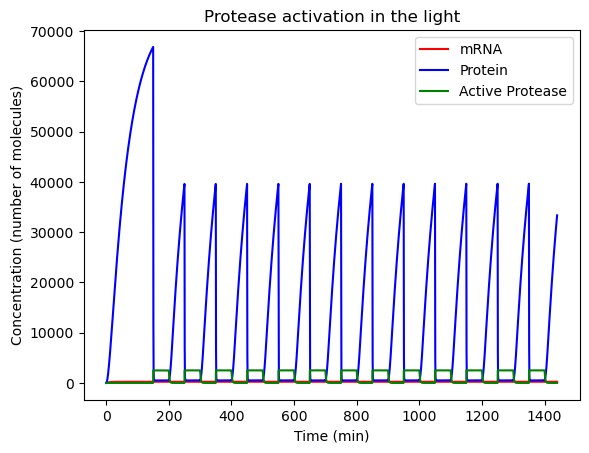

In [217]:
#proteolytic degradation using optogenetically controlled protease
def protease_control(ic, t):
    M, P, protf = ic
    #Parameters

    D = 5 #copy number / free dna
    kbe = 0.5 #de-excitation reaction constant and binding constant
    kde = 0.001 #excitation reaction constant and dissociation constant
    prott = 2500 #Total amount of protease
    dpp = 0.001 #rate of protein degradation due to protease
    km = 4.7 #rate of transcription of DNA
    dm = 0.1 #rate of mRNA degradation/dilution
    kp = 5.3 #rate of translation
    dp = 0.000167 + 0.01667 #rate of protein degradation/dilution
    
    #Light intensity
    I = 0
    
    #for on/off
    #if t < 500:
    #    I = 0
    #elif 500 < t < 1000:
    #    I = 200000
    #elif t > 1000:
    #    I = 0
    
    #for oscillations
    for i in range (200):
        if t < 100:
            I = 0
        elif 100 * i - 50 < t < 100 * i:
            I = 200000
        
    return np.array(
        [
            
            D * km - dm * M,
            
            kp * M - dp * P - dpp * protf * P,
            
            (prott - protf) * I * kde - kbe * protf
            
        ]
    )
    
#Initial conditions [M, P, protf]
prot_ic = np.array([0, 0, 0])

#ODE Solver
def solve_prot(t_max, n_points):
    t = np.linspace(0, t_max, n_points)    
    x = scipy.integrate.odeint(protease_control, prot_ic, t)
    M, P, protf = x.transpose()
    return t, M, P, protf

prot_output = solve_prot(1440, 14400)

t_prot = prot_output[0]
M_prot = prot_output[1]
P_prot = prot_output[2]
protf_prot = prot_output[3]

plt.plot(t_prot, M_prot, color='r', label='mRNA')
plt.plot(t_prot, P_prot, color='b', label='Protein')
plt.plot(t_prot, protf_prot, color='g', label='Active Protease')
plt.xlabel('Time (min)')
plt.ylabel('Concentration (number of molecules)')
plt.title('Protease activation in the light')
plt.legend()
plt.show()

In [4]:
#Graphs for comparisons

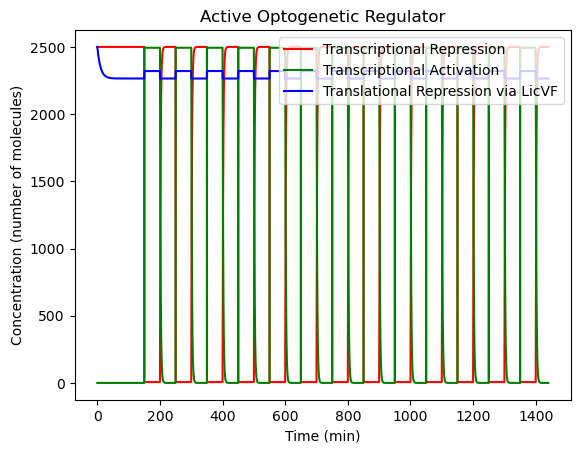

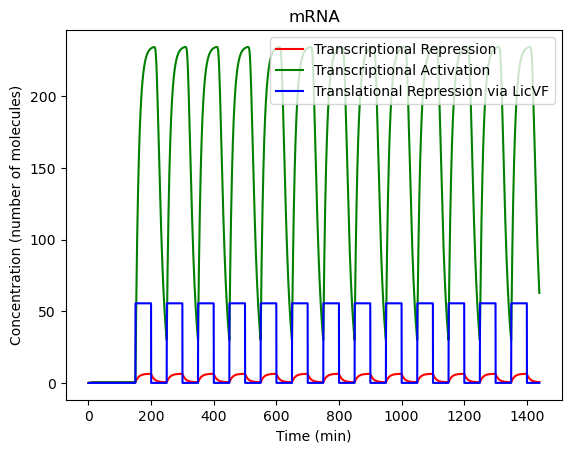

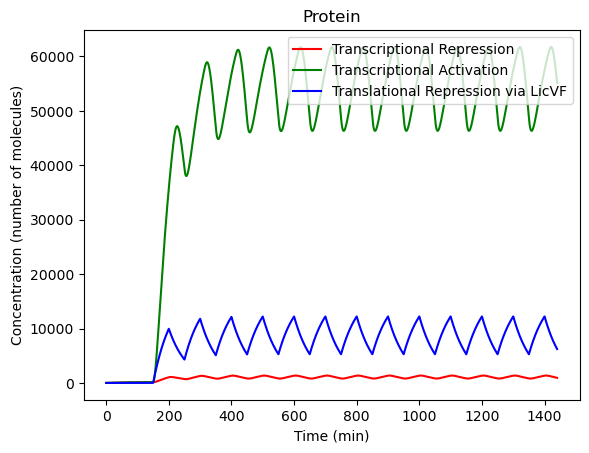

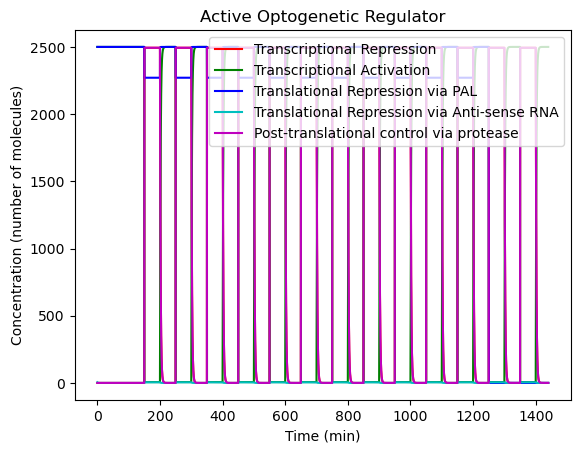

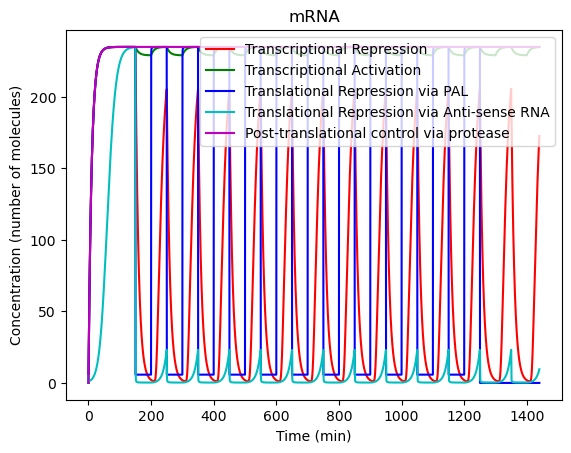

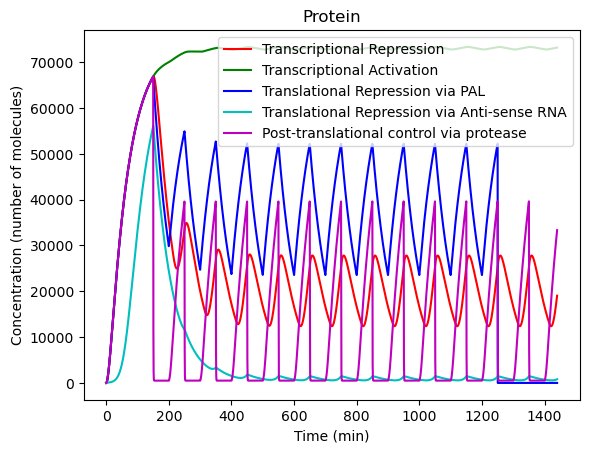

In [220]:
#Light-on systems
#regulator
plt.plot(t_tcRD, R_tcRD, color='r', label='Transcriptional Repression')
plt.plot(t_tcAL, A_tcAL, color='g', label='Transcriptional Activation')
plt.plot(t_LIC, LICf_LIC, color='b', label='Translational Repression via LicVF')
plt.xlabel('Time (min)')
plt.ylabel('Concentration (number of molecules)')
plt.title('Active Optogenetic Regulator')
plt.legend(loc='upper right')
plt.show()
#mRNA
plt.plot(t_tcRD, M_tcRD, color='r', label='Transcriptional Repression')
plt.plot(t_tcAL, M_tcAL, color='g', label='Transcriptional Activation')
plt.plot(t_LIC, Mf_LIC, color='b', label='Translational Repression via LicVF')
plt.xlabel('Time (min)')
plt.ylabel('Concentration (number of molecules)')
plt.title('mRNA')
plt.legend(loc='upper right')
plt.show()
#Protein
plt.plot(t_tcRD, P_tcRD, color='r', label='Transcriptional Repression')
plt.plot(t_tcAL, P_tcAL, color='g', label='Transcriptional Activation')
plt.plot(t_LIC, P_LIC, color='b', label='Translational Repression via LicVF')
plt.xlabel('Time (min)')
plt.ylabel('Concentration (number of molecules)')
plt.title('Protein')
plt.legend(loc='upper right')
plt.show()
#Light off systems
#regulator
plt.plot(t_tcRL, R_tcRL, color='r', label='Transcriptional Repression')
plt.plot(t_tcAD, A_tcAD, color='g', label='Transcriptional Activation')
plt.plot(t_PAL, PALf_PAL, color='b', label='Translational Repression via PAL')
plt.plot(t_Anti, T7_Anti, color='c', label='Translational Repression via Anti-sense RNA')
plt.plot(t_prot, protf_prot, color='m', label='Post-translational control via protease')
plt.xlabel('Time (min)')
plt.ylabel('Concentration (number of molecules)')
plt.title('Active Optogenetic Regulator')
plt.legend(loc='upper right')
plt.show()
#mRNA
plt.plot(t_tcRL, M_tcRL, color='r', label='Transcriptional Repression')
plt.plot(t_tcAD, M_tcAD, color='g', label='Transcriptional Activation')
plt.plot(t_PAL, Mf_PAL, color='b', label='Translational Repression via PAL')
plt.plot(t_Anti, M_Anti, color='c', label='Translational Repression via Anti-sense RNA')
plt.plot(t_prot, M_prot, color='m', label='Post-translational control via protease')
plt.xlabel('Time (min)')
plt.ylabel('Concentration (number of molecules)')
plt.title('mRNA')
plt.legend(loc='upper right')
plt.show()
#Protein
plt.plot(t_tcRL, P_tcRL, color='r', label='Transcriptional Repression')
plt.plot(t_tcAD, P_tcAD, color='g', label='Transcriptional Activation')
plt.plot(t_PAL, P_PAL, color='b', label='Translational Repression via PAL')
plt.plot(t_Anti, P_Anti, color='c', label='Translational Repression via Anti-sense RNA')
plt.plot(t_prot, P_prot, color='m', label='Post-translational control via protease')
plt.xlabel('Time (min)')
plt.ylabel('Concentration (number of molecules)')
plt.title('Protein')
plt.legend(loc='upper right')
plt.show()